In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## All experiments

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


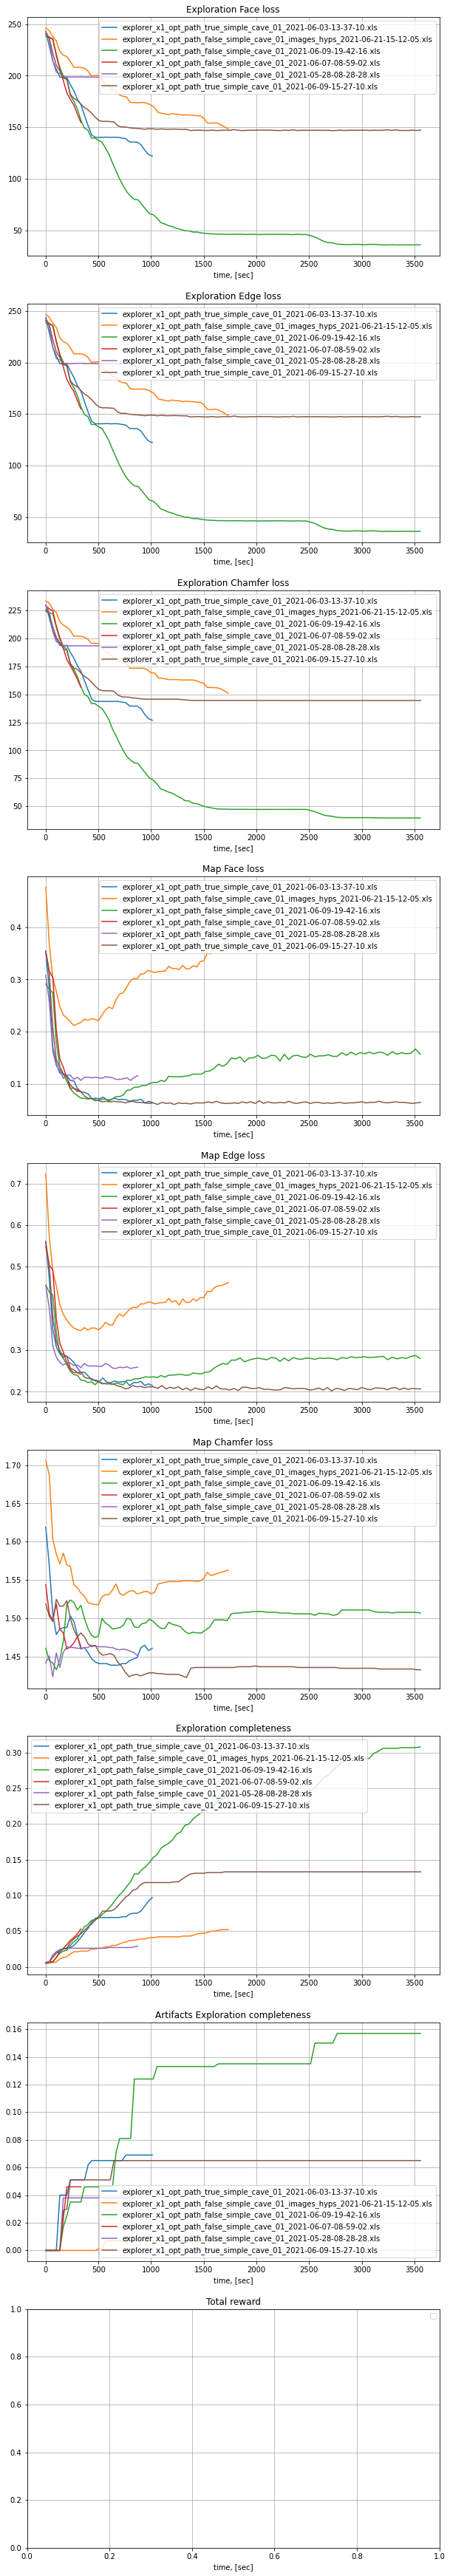

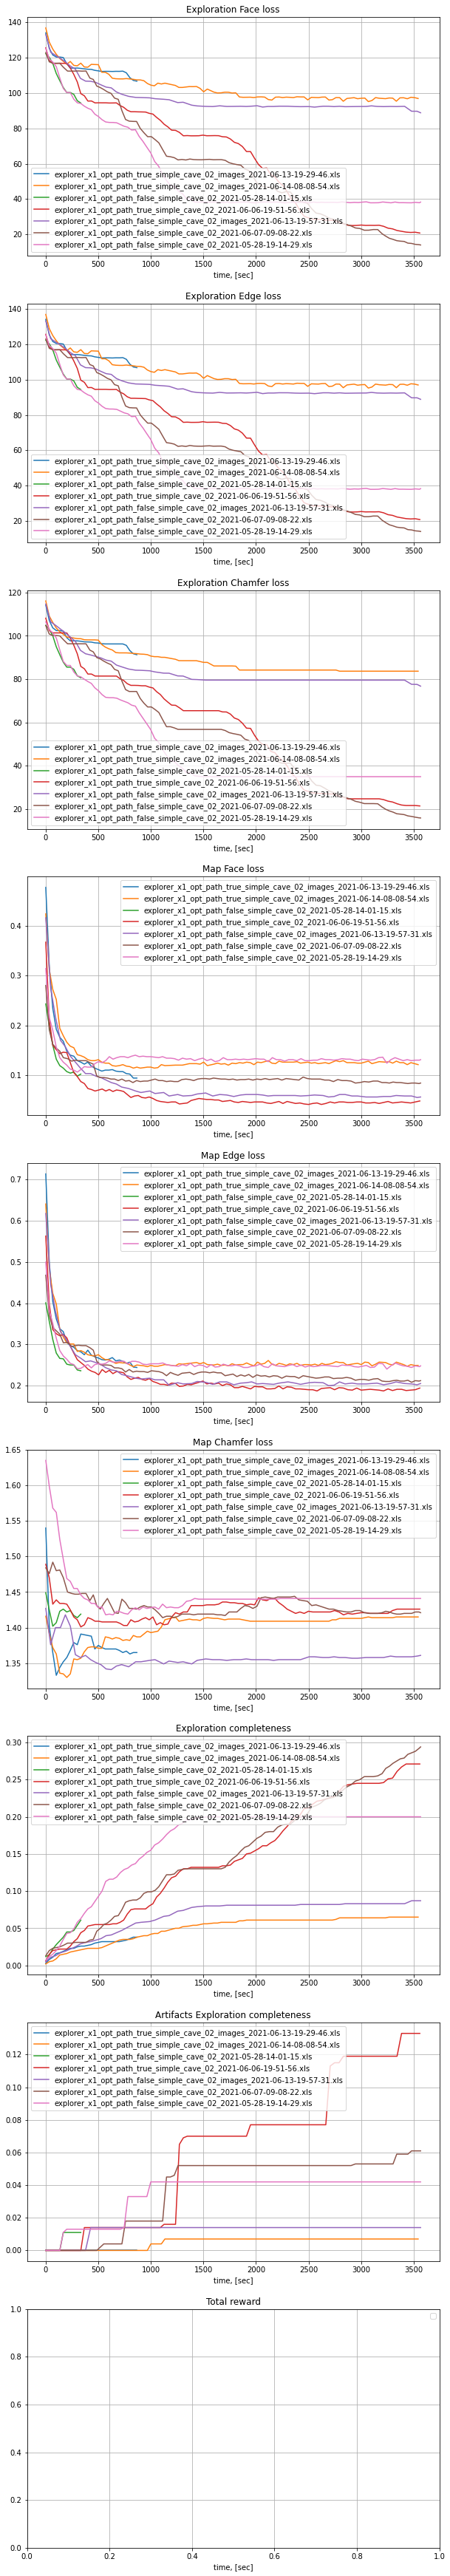

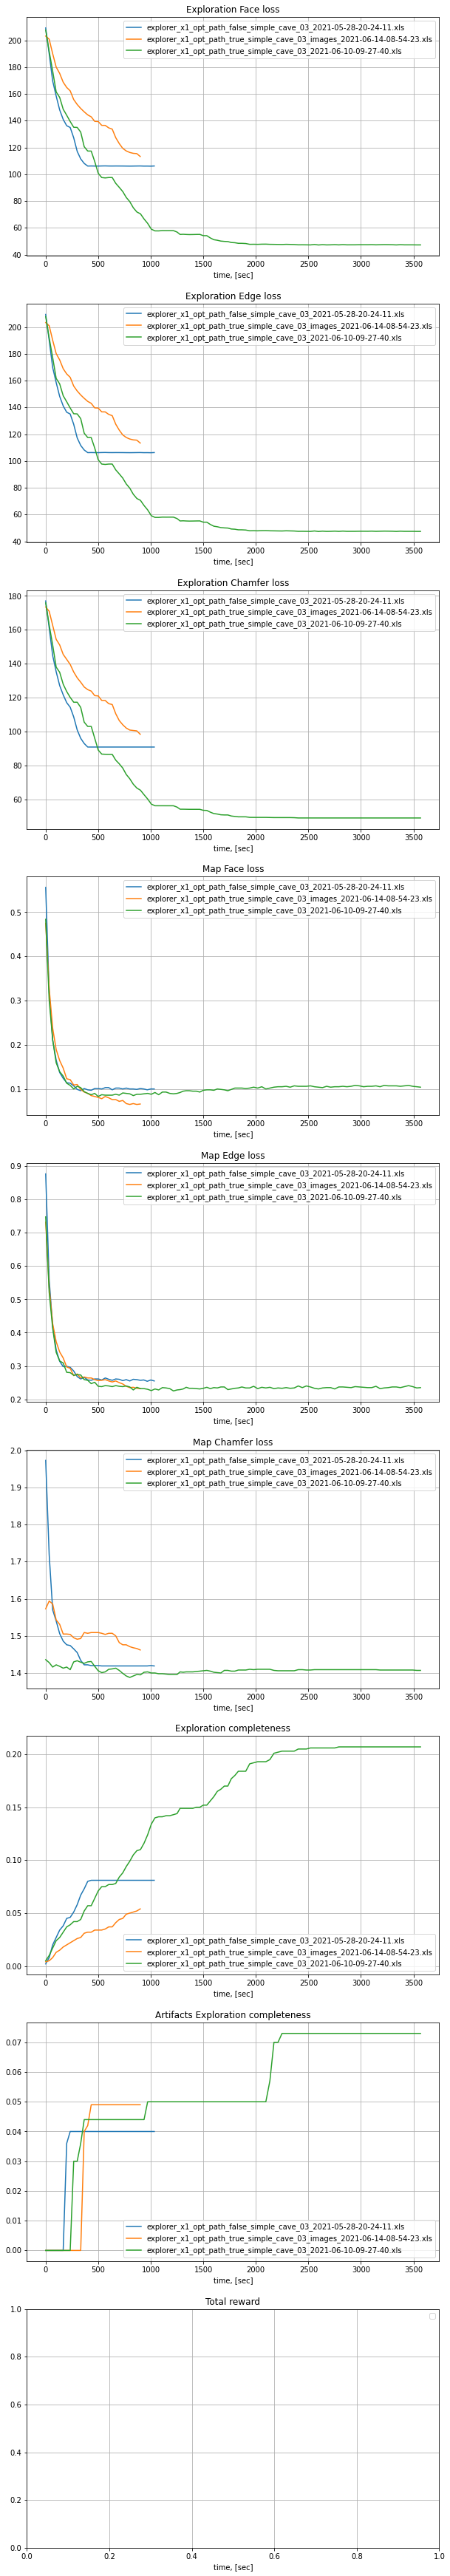

In [2]:
common_metrics = [
            "Exploration Face loss",
            "Exploration Edge loss",
            "Exploration Chamfer loss",
            "Map Face loss",
            "Map Edge loss",
            "Map Chamfer loss",
            "Exploration completeness",
            "Artifacts Exploration completeness",
#             "Detections score",
#             "N of constructed points"
            "Total reward"
          ]

worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]

PATH = '../data/bags/mapping_eval/metrics/'

for world in worlds:
    xls_files = [file for file in os.listdir(PATH) if 'xls' in file and world in file] # and 'opt_path_false' in file]

    plt.figure(figsize=(10, 7*len(common_metrics)))
    plt.title(f"World: {world}")
    for i, metric in enumerate(common_metrics):
        plt.subplot(len(common_metrics), 1, i+1)
        plt.title(metric)
        for file in xls_files:
            data = pd.read_excel(os.path.join(PATH, file))
            if metric in data:
                plt.plot(data['Time stamp'] - data['Time stamp'][0], data[metric], label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        plt.legend();

In [3]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss,Artifacts Exploration completeness,Detections score,N of constructed points
0,58.153726,207.753,207.957,175.881,0.005,0.484,0.748,1.436,0.0,0.0,10000
1,91.498467,191.774,191.974,162.903,0.010,0.302,0.521,1.428,0.0,0.0,10000
2,124.796019,177.034,177.233,151.066,0.017,0.212,0.413,1.416,0.0,0.0,10000
3,158.130049,161.507,161.704,138.019,0.024,0.160,0.341,1.422,0.0,0.0,10000
4,191.487143,157.373,157.570,134.960,0.027,0.140,0.315,1.418,0.0,0.0,10000
